# **CUHK-STAT3009**: Notebook - RS with side information


## Load `MovieLens` dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip -d ./

--2022-11-16 12:35:55--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  11.4MB/s    in 0.4s    

2022-11-16 12:35:56 (11.4 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ./ml-100k/
  inflating: ./ml-100k/allbut.pl     
  inflating: ./ml-100k/mku.sh        
  inflating: ./ml-100k/README        
  inflating: ./ml-100k/u.data        
  inflating: ./ml-100k/u.genre       
  inflating: ./ml-100k/u.info        
  inflating: ./ml-100k/u.item        
  inflating: ./ml-100k/u.occupation  
  inflating: ./ml-100k/u.user        
  inflating: ./ml-100k/u1.base       
  inflating: ./ml-100k/u1.test       
  inflating: ./ml-100k/u

In [ ]:
train = pd.read_csv('./ml-100k/u1.base', 
                 delimiter='\t', 
                 names=['user_id','item_id','rating','timestamp'], 
                 header=None)

In [ ]:
test = pd.read_csv('./ml-100k/u1.test', 
                 delimiter='\t', 
                 names=['user_id','item_id','rating','timestamp'], 
                 header=None)

In [ ]:
print('Total number of users: %d' %len(set(train['user_id'].append(test['user_id']))))
print('Max Id of users: %d' %max(set(train['user_id'].append(test['user_id']))))

Total number of users: 943
Max Id of users: 943


In [ ]:
print('Total number of items: %d' %len(set(train['item_id'].append(test['item_id']))))
print('Max Id of items: %d' %max(set(train['item_id'].append(test['item_id']))))

Total number of items: 1682
Max Id of items: 1682


In [ ]:
train.sample(5)

,user_id,item_id,rating,timestamp
29065,435,321,3,889722170
59076,727,779,2,883712717
57429,711,306,5,879991049
28014,425,79,4,878738335
36113,497,208,3,878759806


## Gathering side information

- user/item side information
- rating pattern

### Merge all user side info

In [ ]:
## gathering user rating pattern
n_user = len(set(train['user_id']).intersection(set(test['user_id'])))
du = {'user_id': [], 'count': [], 'mean': []}
for u in range(n_user):
    rating_tmp = train[train['user_id']==u]
    if len(rating_tmp) > 0:
        du['user_id'].append(u)
        du['count'].append(len(rating_tmp))
        du['mean'].append(np.mean(rating_tmp['rating']))
du = pd.DataFrame(du)

In [ ]:
n_cols = ['user_id', 'age', 'gender', 'occupation', 'zip code']
df_user = pd.read_csv('ml-100k/u.user', sep='|', names=n_cols , encoding='latin-1')

In [ ]:
du_all = pd.merge(du, df_user, on='user_id', suffixes=("", ""))
du_all.sample(3).T

,331,187,94
user_id,332,188,95
count,116,58,157
mean,4.137931,3.896552,3.484076
age,20,42,31
gender,M,M,M
occupation,student,student,administrator
zip code,40504,29440,10707


### Merge all item side information 

In [ ]:
## gathering item rating pattern
n_item = len(set(train['item_id']).intersection(set(test['item_id'])))
di = {'item_id': [], 'count': [], 'mean': []}
for i in range(n_item):
    rating_tmp = train[train['item_id']==i]
    if len(rating_tmp) > 0:
        di['item_id'].append(i)
        di['count'].append(len(rating_tmp))
        di['mean'].append(np.mean(rating_tmp['rating']))
di = pd.DataFrame(di)

In [ ]:
m_cols = ['item_id','title','date','video_date', 'URL',
          'unknown', 'Action', 'Adventure', 'Animation',
          'Children', 'Comedy', 'Crime', 'Documentary',
          'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
          'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
          'Western']
df_item = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols , encoding='latin-1')

In [ ]:
df_item.sample(3).T

,1417,700,697
item_id,1418,701,698
title,"Joy Luck Club, The (1993)","Wonderful, Horrible Life of Leni Riefenstahl, ...","Browning Version, The (1994)"
date,01-Jan-1993,01-Jan-1993,01-Jan-1994
video_date,NaN,NaN,NaN
URL,http://us.imdb.com/M/title-exact?Joy+Luck+Club...,http://us.imdb.com/M/title-exact?Macht%20der%2...,http://us.imdb.com/M/title-exact?Browning%20Ve...
unknown,0,0,0
Action,0,0,0
Adventure,0,0,0
Animation,0,0,0
Children,0,0,0


In [ ]:
df_item['gene'] = df_item[m_cols[5:]].idxmax(axis=1)

In [ ]:
df_item.sample(3).T

,181,1340,238
item_id,182,1341,239
title,GoodFellas (1990),Hedd Wyn (1992),Sneakers (1992)
date,01-Jan-1990,01-Jan-1992,01-Jan-1992
video_date,NaN,NaN,NaN
URL,http://us.imdb.com/M/title-exact?GoodFellas%20...,http://us.imdb.com/M/title-exact?Hedd%20Wyn%20...,http://us.imdb.com/M/title-exact?Sneakers%20(1...
unknown,0,0,0
Action,0,0,0
Adventure,0,0,0
Animation,0,0,0
Children,0,0,0


In [ ]:
di_all = pd.merge(di, df_item[['item_id', 'date', 'gene']], on='item_id', suffixes=("", ""))
di_all.sample(3).T

,339,1150,975
item_id,340,1158,982
count,155,3,16
mean,3.554839,4.0,2.8125
date,01-Jan-1997,30-Oct-1996,13-Sep-1996
gene,Drama,Drama,Action


In [ ]:
## Generate year and month
di_all['year'] = pd.DatetimeIndex(di_all['date']).year
di_all['month'] = pd.DatetimeIndex(di_all['date']).month
del di_all['date']

In [ ]:
di_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 0 to 1361
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   item_id  1362 non-null   int64  
 1   count    1362 non-null   int64  
 2   mean     1362 non-null   float64
 3   gene     1362 non-null   object 
 4   year     1361 non-null   float64
 5   month    1361 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 74.5+ KB


In [ ]:
di_all.sample(3)

,item_id,count,mean,gene,year,month
340,341,7,3.000000,Comedy,1997.0,1.0
446,447,98,3.387755,Horror,1976.0,1.0
413,414,44,3.454545,Comedy,1982.0,1.0


In [ ]:
di_all[di_all['year'].isnull()]

,item_id,count,mean,gene,year,month
266,267,3,2.666667,unknown,NaN,NaN


### Impute the missing data

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
di_all['year'] = imp_mean.fit_transform(di_all['year'].values.reshape(-1, 1))
di_all['month'] = imp_mean.fit_transform(di_all['month'].values.reshape(-1, 1))

## Encoding the ML-100K raw data **MovieLens**

 - `sklearn.preprocessing.LabelEncoder` to encode `categorical feat` 
 - `sklearn.preprocessing.StandardScaler` to standardize `continuous feat`

In [ ]:
du_all.sample(3).T

,239,371,209
user_id,240,372,210
count,15,44,70
mean,3.6,4.227273,3.985714
age,23,25,39
gender,F,F,M
occupation,educator,student,engineer
zip code,20784,66046,03060


In [ ]:
di_all.sample(3).T

,1266,582,278
item_id,1275,583,279
count,3,25,21
mean,3.0,3.08,3.285714
gene,Thriller,Crime,Drama
year,1994.0,1993.0,1995.0
month,1.0,1.0,1.0


In [ ]:
from sklearn import preprocessing

user_cate = ['user_id', 'gender', 'occupation', 'zip code']
item_cate = ['item_id', 'gene', 'month']

user_cont = ['count', 'mean', 'age']
item_cont = ['count', 'mean', 'year']

## user/item encoding
for cate_tmp in ['user_id', 'item_id']:
  le_tmp = preprocessing.LabelEncoder()
  le_tmp.fit(train[cate_tmp].append(test[cate_tmp]))
  train[cate_tmp] = le_tmp.transform(train[cate_tmp])
  test[cate_tmp] = le_tmp.transform(test[cate_tmp])

In [ ]:
## user categorical encoding
for cate_tmp in user_cate:
  le_tmp = preprocessing.LabelEncoder()
  le_tmp.fit(du_all[cate_tmp].values.reshape(-1,1))
  du_all[cate_tmp] = le_tmp.transform(du_all[cate_tmp])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
## user continuous standardization
scaler = preprocessing.StandardScaler()
du_all[user_cont] = scaler.fit_transform(du_all[user_cont].values)

In [ ]:
du_all.sample(3).T

,313,78,168
user_id,313.000000,78.000000,168.000000
count,0.920995,-0.576732,-0.629749
mean,0.116039,1.258454,0.749986
age,-1.192268,0.427326,1.535469
gender,0.000000,0.000000,0.000000
occupation,18.000000,0.000000,13.000000
zip code,41.000000,22.000000,215.000000


In [ ]:
## item categorical encoding
for cate_tmp in item_cate:
  le_tmp = preprocessing.LabelEncoder()
  le_tmp.fit(di_all[cate_tmp].values.reshape(-1,1))
  di_all[cate_tmp] = le_tmp.transform(di_all[cate_tmp])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
## user continuous standardization
scaler = preprocessing.StandardScaler()
di_all[item_cont] = scaler.fit_transform(di_all[item_cont].values)

In [ ]:
di_all.sample(3).T

,156,1270,1002
item_id,156.000000,1270.000000,1002.000000
count,0.604298,-0.737838,-0.074144
mean,0.730030,-0.454975,0.388427
gene,7.000000,1.000000,7.000000
year,-0.213018,0.557109,0.487097
month,0.000000,7.000000,6.000000


### Clarify the dataset

In [ ]:
# tran_pair, train_rating
train_pair = train[['user_id', 'item_id']].values
train_rating = train['rating'].values

# test_pair
test_pair = test[['user_id', 'item_id']].values
# get descriptive parameters for the dataset
n_user, n_item = max(train_pair[:,0].max(), test_pair[:,0].max())+1, max(train_pair[:,1].max(), test_pair[:,1].max())+1
print('total number of users: %d; total number of items: %d' %(n_user, n_item))

total number of users: 943; total number of items: 1682


In [ ]:
## user embedding - user: cate: [user_id, gender, occupation, zip code]; cout: [count, mean, age]
## movie embedding - item: [item_id, gene, month]; cout: [count, mean, year]
train = pd.merge(train, du_all[['user_id', 'gender', 'occupation', 'zip code', 'count', 'mean', 'age']], 
                 on='user_id', suffixes=("", "_user"))
test = pd.merge(test, du_all[['user_id', 'gender', 'occupation', 'zip code', 'count', 'mean', 'age']], 
                on='user_id', suffixes=("", "_user"))

train = pd.merge(train, di_all[['item_id', 'gene', 'month', 'count', 'mean', 'year']], 
                 on='item_id', suffixes=("", "_item"))
test = pd.merge(test, di_all[['item_id', 'gene', 'month', 'count', 'mean', 'year']], 
                on='item_id', suffixes=("", "_item"))

In [ ]:
num_cate = np.max(train[['gender', 'occupation', 'zip code', 'gene', 'month']].append(test[['gender', 'occupation', 'zip code', 'gene', 'month']]), axis=0) + 1

In [ ]:
num_cate

gender          2
occupation     21
zip code      415
gene           18
month          13
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(train, test_size=0.30, random_state=42)

In [ ]:
valid.sample(3)

,user_id,item_id,rating,timestamp,gender,occupation,zip code,count,mean,age,gene,month,count_item,mean_item,year
3162,320,126,3,879438651,0,3,238,0.019708,0.445174,1.279743,0,0,4.158744,1.564857,-1.193180
13400,249,258,1,883262792,1,6,381,-0.073072,0.470357,-0.425092,3,0,1.105755,-0.612733,0.557109
7431,449,272,3,882377726,0,3,64,5.612989,0.531575,0.086358,0,0,1.872689,0.492780,0.417086


## Build up neural networks

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

- user_cate: ['user_id', 'gender', 'occupation', 'zip code']
- item_cate: ['item_id', 'gene', 'month']

- user_cont: ['count', 'mean', 'age']
- item_cont: ['count', 'mean', 'year']

### **LinearRS**: linear models in RS with side information
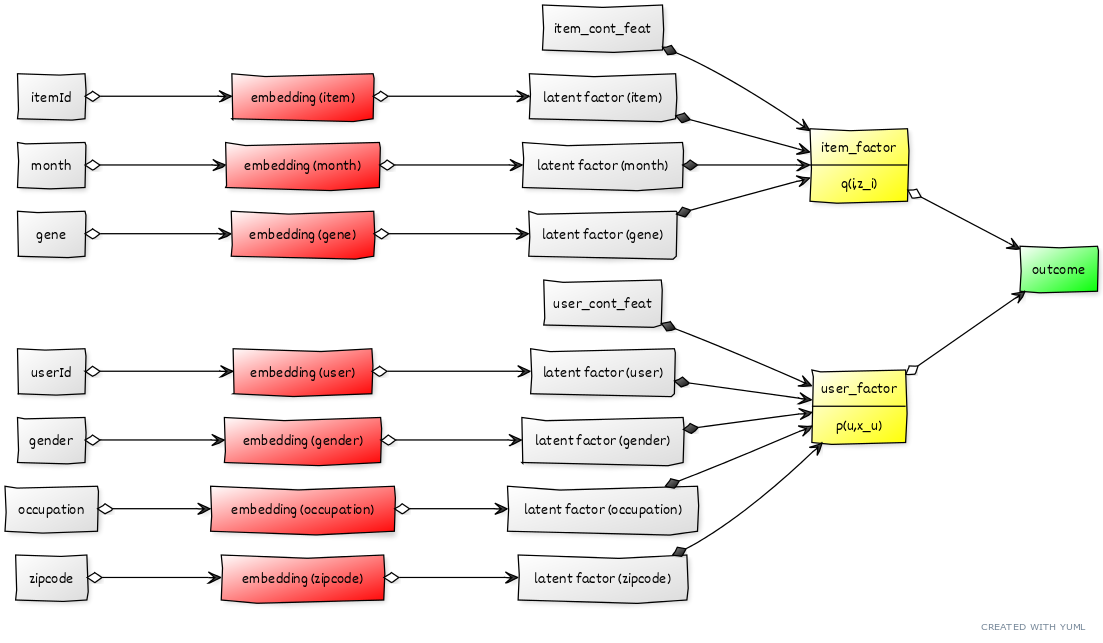

In [ ]:
class LinearRS(keras.Model):
    def __init__(self, num_users, num_movies, num_gender, num_occupation, num_zipcode, num_gene, num_month, embedding_size, **kwargs):
        super(LinearRS, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.num_gender = num_gender
        self.num_occupation = num_occupation
        self.num_zipcode = num_zipcode
        self.embedding_size = embedding_size
        ## Embedding layers
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_regularizer=keras.regularizers.l2(1e-2),
        )
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_regularizer=keras.regularizers.l2(1e-2),
        )
        self.gender_embedding = layers.Embedding(
            num_gender,
            embedding_size,
            embeddings_regularizer=keras.regularizers.l2(1e-2),
        )
        self.occupation_embedding = layers.Embedding(
            num_occupation,
            embedding_size,
            embeddings_regularizer=keras.regularizers.l2(1e-2),
        )
        self.zipcode_embedding = layers.Embedding(
            num_zipcode,
            embedding_size,
            embeddings_regularizer=keras.regularizers.l2(1e-2),
        )
        self.gene_embedding = layers.Embedding(
            num_gene,
            embedding_size,
            embeddings_regularizer=keras.regularizers.l2(1e-2),
        )
        self.month_embedding = layers.Embedding(
            num_month,
            embedding_size,
            embeddings_regularizer=keras.regularizers.l2(1e-2),
        )
        ## Linear Mapping layers
        self.user_dense = layers.Dense(embedding_size, name='user_cont', activation='linear')
        self.item_dense = layers.Dense(embedding_size, name='item_cont', activation='linear')

    def call(self, inputs):
        ## cate/cont data
        user_cont_feat, item_cont_feat, user_cate_feat, item_cate_feat = inputs[0], inputs[1], inputs[2], inputs[3]

        ## user embedding - user: [user_id, gender, occupation, zipcode]
        user_vec = self.user_embedding(user_cate_feat[:, 0])
        gender_vec = self.gender_embedding(user_cate_feat[:, 1])
        occupation_vec = self.occupation_embedding(user_cate_feat[:, 2])
        zipcode_vec = self.zipcode_embedding(user_cate_feat[:, 3])

        ## movie embedding - item: [item_id, gene, month]
        movie_vec = self.movie_embedding(item_cate_feat[:, 0])
        gene_vec = self.gene_embedding(item_cate_feat[:, 1])
        month_vec = self.month_embedding(item_cate_feat[:, 2])

        ## user cont mapping
        user_cont_vec = self.user_dense(user_cont_feat)
        item_cont_vec = self.item_dense(item_cont_feat)

        ## product
        user_factor = user_vec + gender_vec + occupation_vec + zipcode_vec + user_cont_vec
        item_factor = movie_vec + gene_vec + month_vec + item_cont_vec
        # dot_user_movie = tf.matmul(user_factor,tf.transpose(item_factor))
        return tf.reduce_sum(user_factor * item_factor, axis=1, keepdims=True)

In [ ]:
## user_cont_feat, item_cont_feat, user_cate_feat, item_cate_feat
# [user_id, gender, occupation, zipcode]
# [item_id, gene, month]
train_input = [train[['count', 'mean', 'age']].values, train[['count_item', 'mean_item', 'year']].values, \
              train[['user_id', 'gender', 'occupation', 'zip code']].astype(int).values,\
              train[['item_id', 'gene', 'month']].astype(int).values]

valid_input = [valid[['count', 'mean', 'age']].values, valid[['count_item', 'mean_item', 'year']].values, \
              valid[['user_id', 'gender', 'occupation', 'zip code']].astype(int).values,\
              valid[['item_id', 'gene', 'month']].astype(int).values]

test_input = [test[['count', 'mean', 'age']].values, test[['count_item', 'mean_item', 'year']].values, \
              test[['user_id', 'gender', 'occupation', 'zip code']].astype(int).values,\
              test[['item_id', 'gene', 'month']].astype(int).values]

In [ ]:
model = LinearRS(num_users=n_user, num_movies=n_item, 
                   num_gender=num_cate[0], num_occupation=num_cate[1], num_zipcode=num_cate[2],
                   num_gene=num_cate[3], num_month=num_cate[4],
                   embedding_size=100)

metrics = [
    keras.metrics.MeanAbsoluteError(name='mae'),
    keras.metrics.RootMeanSquaredError(name='rmse')
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-3), 
    loss=tf.keras.losses.MeanSquaredError(), 
    metrics=metrics
)

In [ ]:
user_cont_feat, item_cont_feat, user_cate_feat, item_cate_feat = valid_input[0], valid_input[1], valid_input[2], valid_input[3]

user_factor = model.user_dense(user_cont_feat)
item_factor = model.item_dense(item_cont_feat)
tf.reduce_sum(user_factor * item_factor, axis=1)

<tf.Tensor: shape=(9574,), dtype=float32, numpy=
array([-0.09074907, -0.11186936,  0.01869014, ...,  1.6403404 ,
        0.65757966, -0.8659375 ], dtype=float32)>

In [ ]:
valid['rating'].astype(float).values

array([3., 3., 3., ..., 5., 4., 5.])

In [ ]:
callbacks = [keras.callbacks.EarlyStopping( 
    monitor='val_rmse', min_delta=0, patience=5, verbose=1, 
    mode='min', baseline=None, restore_best_weights=True)]

history = model.fit(
    x=train_input,
    y=train['rating'].astype(float).values[:,np.newaxis],
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_data=(valid_input, valid['rating'].astype(float).values[:,np.newaxis])
)

Epoch 1/50
350/350 [==============================] - 5s 11ms/step - loss: 2.9999 - mae: 1.1542 - rmse: 1.5620 - val_loss: 1.2938 - val_mae: 0.7861 - val_rmse: 1.0026
Epoch 2/50
350/350 [==============================] - 3s 10ms/step - loss: 1.1516 - mae: 0.7618 - rmse: 0.9662 - val_loss: 1.1550 - val_mae: 0.7750 - val_rmse: 0.9917
Epoch 3/50
350/350 [==============================] - 3s 9ms/step - loss: 1.0954 - mae: 0.7633 - rmse: 0.9664 - val_loss: 1.1187 - val_mae: 0.7794 - val_rmse: 0.9865
Epoch 4/50
350/350 [==============================] - 3s 9ms/step - loss: 1.0659 - mae: 0.7600 - rmse: 0.9609 - val_loss: 1.1105 - val_mae: 0.7733 - val_rmse: 0.9874
Epoch 5/50
350/350 [==============================] - 3s 10ms/step - loss: 1.0542 - mae: 0.7588 - rmse: 0.9601 - val_loss: 1.0910 - val_mae: 0.7766 - val_rmse: 0.9830
Epoch 6/50
350/350 [==============================] - 3s 9ms/step - loss: 1.0469 - mae: 0.7579 - rmse: 0.9594 - val_loss: 1.0929 - val_mae: 0.7676 - val_rmse: 0.9862
E

In [ ]:
model.evaluate(test_input, test['rating'].astype(float).values[:,np.newaxis])

620/620 [==============================] - 2s 3ms/step - loss: 1.0378 - mae: 0.7831 - rmse: 0.9812


[1.0378111600875854, 0.7831147909164429, 0.9812017679214478]

### **TTowerRS**: two-tower models for RS
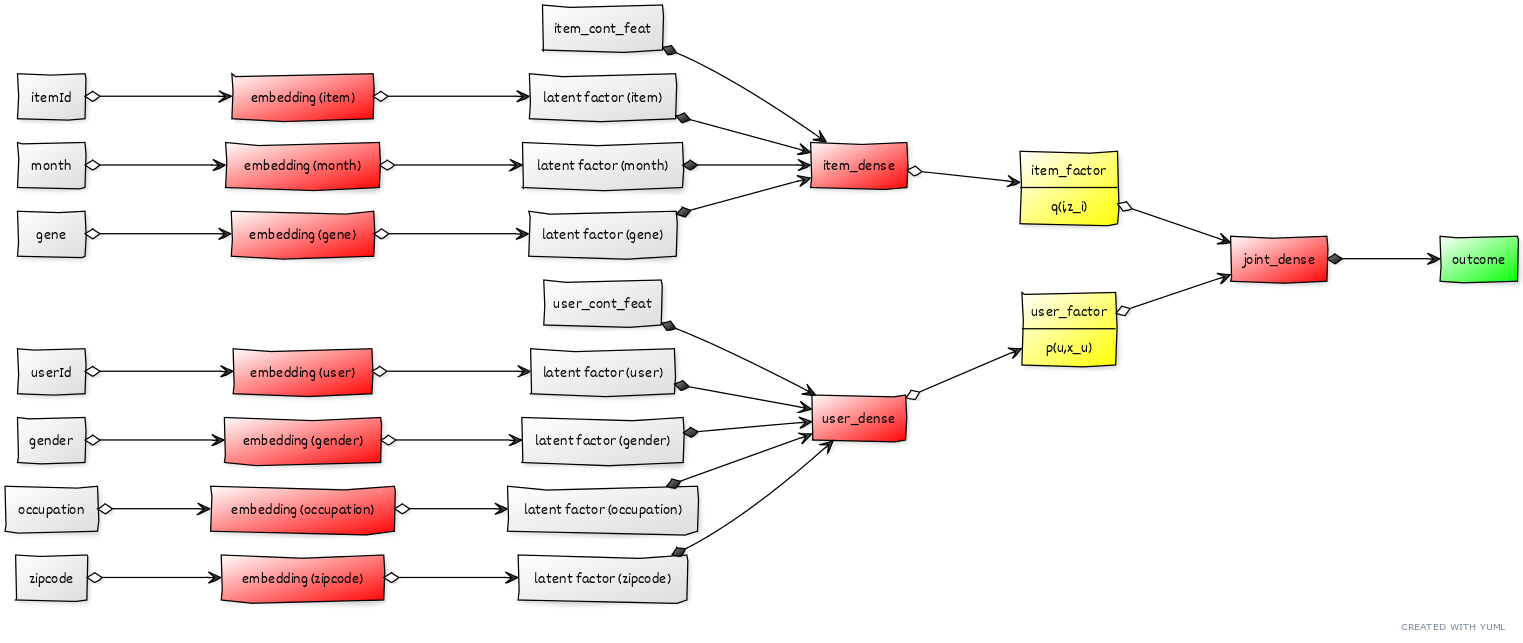

In [ ]:
class TTowerRS(keras.Model):
    def __init__(self, num_users, num_movies, num_gender, num_occupation, num_zipcode, num_gene, num_month, embedding_size, dense_size, **kwargs):
        super(TTowerRS, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.num_gender = num_gender
        self.num_occupation = num_occupation
        self.num_zipcode = num_zipcode
        self.embedding_size = embedding_size
        ## Embedding layers
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.gender_embedding = layers.Embedding(
            num_gender,
            embedding_size,
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.occupation_embedding = layers.Embedding(
            num_occupation,
            embedding_size,
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.zipcode_embedding = layers.Embedding(
            num_zipcode,
            embedding_size,
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.gene_embedding = layers.Embedding(
            num_gene,
            embedding_size,
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.month_embedding = layers.Embedding(
            num_month,
            embedding_size,
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        ##  Mapping layers
        self.user_dense = layers.Dense(dense_size, name='user_dense', activation='relu')
        self.item_dense = layers.Dense(dense_size, name='item_dense', activation='relu')
        self.joint_dense = layers.Dense(1, name='joint_dense', activation='linear')

    def call(self, inputs):
        ## cate/cont data
        user_cont_feat, item_cont_feat, user_cate_feat, item_cate_feat = inputs[0], inputs[1], inputs[2], inputs[3]

        ## user embedding - user: [user_id, gender, occupation, zipcode]
        user_vec = self.user_embedding(user_cate_feat[:, 0])
        gender_vec = self.gender_embedding(user_cate_feat[:, 1])
        occupation_vec = self.occupation_embedding(user_cate_feat[:, 2])
        zipcode_vec = self.zipcode_embedding(user_cate_feat[:, 3])

        ## movie embedding - item: [item_id, gene, month]
        movie_vec = self.movie_embedding(item_cate_feat[:, 0])
        gene_vec = self.gene_embedding(item_cate_feat[:, 1])
        month_vec = self.month_embedding(item_cate_feat[:, 2])

        ## user/item dense mapping
        user_all_vec = layers.Concatenate()([user_cont_feat, user_vec, gender_vec, occupation_vec, zipcode_vec])
        item_all_vec = layers.Concatenate()([item_cont_feat, movie_vec, gene_vec, month_vec])

        user_dense_vec = self.user_dense(user_all_vec)
        item_dense_vec = self.item_dense(item_all_vec)

        ## joint dense
        joint_vec = layers.Concatenate()([user_dense_vec, item_dense_vec])
        out = self.joint_dense(joint_vec)
        return out

In [ ]:
model = TTowerRS(num_users=n_user, num_movies=n_item, 
                   num_gender=num_cate[0], num_occupation=num_cate[1], num_zipcode=num_cate[2],
                   num_gene=num_cate[3], num_month=num_cate[4],
                   embedding_size=100, dense_size=50)

metrics = [
    keras.metrics.MeanAbsoluteError(name='mae'),
    keras.metrics.RootMeanSquaredError(name='rmse')
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-4), 
    loss=tf.keras.losses.MeanSquaredError(), 
    metrics=metrics
)

In [ ]:
callbacks = [keras.callbacks.EarlyStopping( 
    monitor='val_rmse', min_delta=0, patience=5, verbose=1, 
    mode='min', baseline=None, restore_best_weights=True)]

history = model.fit(
    x=train_input,
    y=train['rating'].astype(float).values[:,np.newaxis],
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_data=(valid_input, valid['rating'].astype(float).values[:,np.newaxis])
)

Epoch 1/50
350/350 [==============================] - 5s 11ms/step - loss: 7.0284 - mae: 2.2607 - rmse: 2.6172 - val_loss: 1.4635 - val_mae: 0.9435 - val_rmse: 1.1484
Epoch 2/50
350/350 [==============================] - 3s 9ms/step - loss: 1.2195 - mae: 0.8419 - rmse: 1.0435 - val_loss: 1.1382 - val_mae: 0.8065 - val_rmse: 1.0092
Epoch 3/50
350/350 [==============================] - 3s 10ms/step - loss: 1.0671 - mae: 0.7777 - rmse: 0.9771 - val_loss: 1.0741 - val_mae: 0.7805 - val_rmse: 0.9840
Epoch 4/50
350/350 [==============================] - 3s 10ms/step - loss: 1.0117 - mae: 0.7557 - rmse: 0.9544 - val_loss: 1.0441 - val_mae: 0.7722 - val_rmse: 0.9736
Epoch 5/50
350/350 [==============================] - 3s 9ms/step - loss: 0.9737 - mae: 0.7423 - rmse: 0.9385 - val_loss: 1.0276 - val_mae: 0.7635 - val_rmse: 0.9685
Epoch 6/50
350/350 [==============================] - 3s 9ms/step - loss: 0.9457 - mae: 0.7315 - rmse: 0.9266 - val_loss: 1.0171 - val_mae: 0.7621 - val_rmse: 0.9656
E

In [ ]:
model.evaluate(test_input, test['rating'].astype(float).values[:,np.newaxis])

620/620 [==============================] - 2s 2ms/step - loss: 0.9838 - mae: 0.7659 - rmse: 0.9799


[0.9838049411773682, 0.7658504843711853, 0.9798629879951477]

In [ ]:
model.summary()

Model: "t_tower_rs"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     multiple                  94300     
                                                                 
 embedding_8 (Embedding)     multiple                  168200    
                                                                 
 embedding_9 (Embedding)     multiple                  200       
                                                                 
 embedding_10 (Embedding)    multiple                  2100      
                                                                 
 embedding_11 (Embedding)    multiple                  41500     
                                                                 
 embedding_12 (Embedding)    multiple                  1800      
                                                                 
 embedding_13 (Embedding)    multiple                  1